In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('../data/listings_summary.csv')

data.head(3).append(data.tail(3))                            #查看数据前几行+后几行

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
85065,39869214,Holland Road - Kensington Olympia,251922260,Christian,NaN,Hammersmith and Fulham,51.50244,-0.21547,Entire home/apt,90,3,0,NaN,NaN,4,63
85066,39869249,Functional single room 18 min to London Bridge,255372486,Nudrat,NaN,Bromley,51.35742,0.10764,Private room,30,2,0,NaN,NaN,4,1
85067,39869282,"EXQUISITE APARTMENT, PEACEFUL ENVIRONMENT IN SOHO",210531062,Radi,NaN,Westminster,51.51090,-0.12480,Entire home/apt,187,1,0,NaN,NaN,1,311


In [3]:
columns=['host_id','latitude','longitude','price']
data=data[columns]

data.head(3).append(data.tail(3))                            #查看数据前几行+后几行

,host_id,latitude,longitude,price
0,43039,51.46225,-0.11732,88
1,54730,51.56802,-0.11121,65
2,491286,51.51074,-0.19853,105
85065,251922260,51.50244,-0.21547,90
85066,255372486,51.35742,0.10764,30
85067,210531062,51.51090,-0.12480,187


查看数据缺失情况

In [4]:
pd.DataFrame({'percentile':data.isnull().sum()/data.shape[0],'count':data.isnull().sum()})# 查看缺失率情况

,percentile,count
host_id,0.0,0
latitude,0.0,0
longitude,0.0,0
price,0.0,0


查看价格分布情况

In [5]:
data['price'].describe()

count    85068.000000
mean       122.336766
std        220.749123
min          0.000000
25%         47.000000
50%         84.000000
75%        140.000000
max      12345.000000
Name: price, dtype: float64

最贵的价格远远超过均值与中位数，并且其为12345，更像是一个系统定的数值,暂时不处理

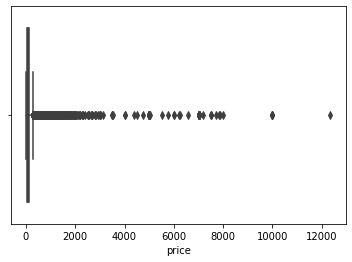

In [6]:
sns.boxplot(data['price'])

## 地理可视化

In [7]:
import keplergl
with open('../data/neighbourhoods.geojson', 'r',encoding='utf-8') as f:
    geojson = f.read()
map_1 = keplergl.KeplerGl(height=600,data={'geojson':geojson})
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'geojson': '{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Multi…

In [8]:
map_1.add_data(data,name='layer_1')

In [10]:
map_1.save_to_html(file_name='伦敦房租地理可视化.html') # 导出网页

Map saved to 伦敦房租地理可视化.html!
